# Randomness and Probability¶
In this exercise, we will use random.choice to produce random samples with and without replacement. Follow these steps to complete this exercise:

1.Import the NumPy library:

In [1]:
import numpy as np

2.Create two lists containing four different suits and 13 different ranks in the set of standard cards:

In [2]:
a = ['a' + str(i) for i in range(1, 14)]
b = ['b' + str(i) for i in range(1, 14)]
c = ['c' + str(i) for i in range(1, 14)]
d = ['d' + str(i) for i in range(1, 14)]

3.Create a list, named cards, containing the 52 cards of the standard deck:

In [3]:
deck = a + b + c + d


4.Use the np.random.choice function to draw a hand (five cards) from the deck. Use replace=False so that each card gets selected only once:

In [4]:
list(np.random.choice(deck, 5, replace = False))

['c1', 'a3', 'd4', 'd3', 'd6']

5.Now, create a function named deal_hands that returns two lists, each with five cards drawn from the same deck. Use replace=False in the np.random.choice function. This function will perform sampling without replacement:

In [5]:
def deal_hands():
    return list(np.random.choice(deck, 5, replace = False)), list(np.random.choice(deck, 5, replace = False))

In [6]:
deal_hands()

(['b3', 'd12', 'd11', 'b9', 'd1'], ['b12', 'd11', 'd5', 'a10', 'a12'])


6.Create a second function called deal_hands2 that's identical to the last one, but with the replace=True argument in the np.random.choice function. This function will perform sampling with replacement:

7.Finally, run the following code:

In [7]:
def deal_hands2():
    return list(np.random.choice(deck, 5, replace = True)), list(np.random.choice(deck, 5, replace = True))

In [8]:
np.random.seed(2)
deal_hands2()

(['d2', 'b3', 'd7', 'a9', 'b10'], ['d5', 'b6', 'a12', 'd2', 'a8'])

## Binomial Distribution¶
Exercise: Checking If a Random Variable Follows a Binomial Distribution
In this exercise, we will practice how to verify if a random variable follows a binomial distribution. We will also create a random variable using scipy.stats and plot the distribution. This will be a mostly conceptual exercise.

Here, we will check if the random variable, Z: number of defective auto parts in a 12-box pack, follows a binomial distribution (remember that we consider 4% of the auto parts are defective). Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

2.Try to conceptually check if Z fulfills the properties given for a binomial random variable:

3.Determine the p and n parameters for the distributions of this variable, that is, p = 0.04 and n = 12.


4.Use the theoretical formula with the former parameters to get the exact theoretical probability of getting exactly one defective piece per box (using x = 1):

In [10]:
stats.binom.pmf(1, 12, 0.04)   # x, n, p

0.30635487866488303


5.Use the scipy.stats module to produce an instance of the Z random variable. Name it Z_rv:

In [11]:
Z_rv = stats.binom(12, 0.04)

In [12]:
Z_rv.rvs(10)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [13]:
n = 12

6.Plot the probability mass function of Z:

In [14]:
dist = []

print('r\tp(r)')
for i in range(n + 1):
    dist.append(Z_rv.pmf(i))
    print(str(i) + '\t' + str(Z_rv.pmf(i)))

r	p(r)
0	0.6127097573297674
1	0.30635487866488303
2	0.0702063263607024
3	0.00975087866120869
4	0.0009141448744883129
5	6.094299163255422e-05
6	2.9625065376936106e-06
7	1.0580380491762873e-07
8	2.755307419729918e-09
9	5.1024211476480043e-11
10	6.378026434559986e-13
11	4.831838207999973e-15
12	1.6777216000000067e-17


<BarContainer object of 13 artists>

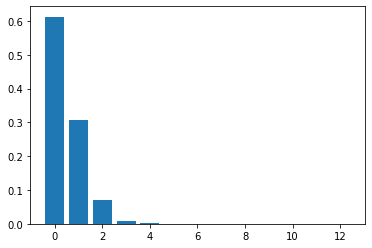

In [15]:
plt.bar(list(range(n + 1)), dist)


# Normal Distribution
Exercise: Using the Normal Distribution in Education
In this exercise, we'll use a normal distribution object from scipy.stats and the cdf and its inverse, ppf, to answer questions about education.

In psychometrics and education, it is a well-known fact that many variables relevant to education policy are normally distributed. For instance, scores in standardized mathematics tests follow a normal distribution. In this exercise, we'll explore this phenomenon: in a certain country, high school students take a standardized mathematics test whose scores follow a normal distribution with the following parameters: mean = 100, standard deviation = 15. Follow these steps to complete this exercise:

1.Import NumPy, Matplotlib, and scipy.stats following the usual conventions:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
mu = 100
std = 15


2.Use the scipy.stats module to produce an instance of a normally distributed random variable, named X_rv, with mean = 100 and standard deviation = 15:

In [4]:
X_rv = stats.norm(mu, std)   # mu, sigma

3.Plot the probability distribution of X:

In [5]:
x = np.linspace(mu - 4 * std, mu + 4 * std)
y = X_rv.pdf(x)

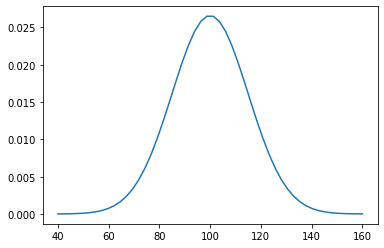

In [6]:
plt.plot(x, y)


4.The Ministry of Education has decided that the minimum score for someone to be considered competent in mathematics is 80. Use the cdf method to calculate the proportion of students that will get a score above that score:

In [7]:
X_rv_80 = 1- X_rv.cdf(80)

In [8]:
X_rv_80

0.9087887802741321

In [14]:
X_rv.pdf(80)       # pmf for cont. dist.

0.010934004978399577

5.A very selective university wants to set very high standards for high school students that are admitted to their programs. The policy of the university is to only admit students with mathematics scores in the top 2% of the population. Use the ppf method (which is essentially the inverse function of the cdf method) with an argument of 1 - 0.02 = 0.98 to get the cut-off score for admission:

In [9]:
prop = 0.02                # ppf give us 1 - 0.02 = 0.98. point
cut_off = X_rv.ppf(1-prop)

In [10]:
cut_off

130.80623365947733

In [13]:
X_rv.cdf(130.80623365947733)

0.98